In [1]:
import networkx as nx
from isingNetwork import IsingModel
import numpy as np
from tqdm import tqdm

In [2]:
g = nx.barabasi_albert_graph(500, 5)
t_range = np.linspace(1, 30, 100)

In [ ]:
import matplotlib.pyplot as plt

adj_matrix = nx.adjacency_matrix(g)
plt.imshow(adj_matrix.toarray(), cmap='hot_r')

#plt.gca().invert_yaxis()

plt.xlabel('site i')
plt.ylabel('site j')
plt.show()

In [3]:
model = IsingModel(g, temperature_range=t_range, iterations=20000, J=1, simmetric=False)

In [ ]:

model.iterate()
model.plot('magnetization_per_spin', r'Order parameter $M$')

In [ ]:
model.set_J(-1)
model.iterate()
model.plot('magnetization_per_spin',r'Order parameter $M$')

In [4]:
h_range = [0.01, 0.1, 1, 10, 100]

In [5]:
M = []
for h in tqdm(h_range):
    model.set_external_field(h)
    model.iterate()
    M.append(model.get_data('magnetization_per_spin'))

100%|██████████| 5/5 [2:37:52<00:00, 1894.42s/it]  


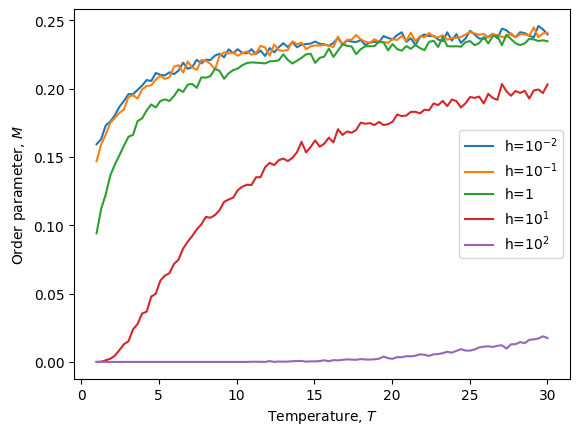

In [8]:
import matplotlib.pyplot as plt

h_strings = [r'$10^{-2}$', r'$10^{-1}$', r'$1$', r'$10^1$', r'$10^2$']

for i in range(len(M)):
    plt.plot(t_range, M[i], label='h='+ h_strings[i])

plt.legend()
plt.xlabel(r'Temperature, $T$')
plt.ylabel(r'Order parameter, $M$')
plt.show()

In [9]:
# You can save the list M by doing:

np.savez('M(T)_N=500_iteration=20000_J=1.npz', *M)

In [ ]:
#To load the same data:
loaded_data = np.load('M(T)_N=500_iteration=20000_J=1.npz')
loaded_list = [loaded_data[key] for key in loaded_data.keys()]


for i in range(len(loaded_list)):
    plt.plot(t_range, loaded_list[i], label='h='+ h_strings[i])

plt.legend()
plt.xlabel(r'Temperature, $T$')
plt.ylabel(r'Order parameter, $M$')
plt.show()

In [5]:
model.set_J(-1)
M = []
for h in tqdm(h_range):
    model.set_external_field(h)
    model.iterate()
    M.append(model.get_data('magnetization_per_spin'))

100%|██████████| 5/5 [2:29:18<00:00, 1791.75s/it]


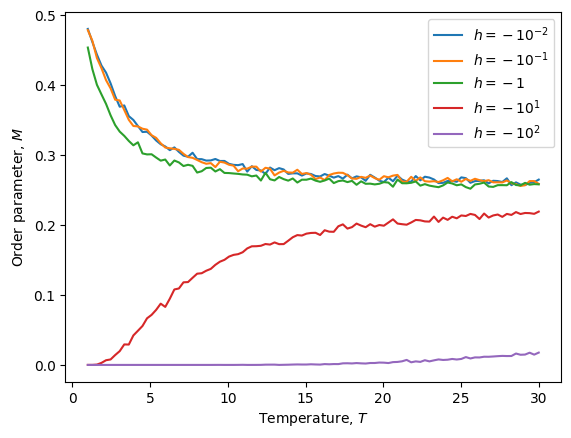

In [37]:
import matplotlib.pyplot as plt

h_strings = [r'$h=-10^{-2}$', r'$h=-10^{-1}$', r'$h=-1$', r'$h=-10^1$', r'$h=-10^2$']

for i in range(len(M)):
    plt.plot(t_range, M[i], label=h_strings[i])

plt.legend()
plt.xlabel(r'Temperature, $T$')
plt.ylabel(r'Order parameter, $M$')
plt.show()

In [7]:
np.savez('M(T)_N=500_iteration=20000_J=-1.npz', *M)

In [8]:
#FIGURE 3.4

In [9]:
T = 0.1
J_range = 1
h_range = np.linspace(-10,10,100)

In [10]:
from joblib import Parallel, delayed    #to compute things in parallel
import multiprocessing
num_cores = multiprocessing.cpu_count()

def iterateForH(h):
    model.set_external_field(h)
    data = model.simulate(T)

    return data['magnetization_per_spin']

In [16]:
model.set_J(1)
MVsH_J1 = Parallel(n_jobs=num_cores)(delayed(iterateForH)(h) for h in h_range)

In [13]:
model.set_J(-1)
MVsH_J2 = Parallel(n_jobs=num_cores)(delayed(iterateForH)(h) for h in h_range)

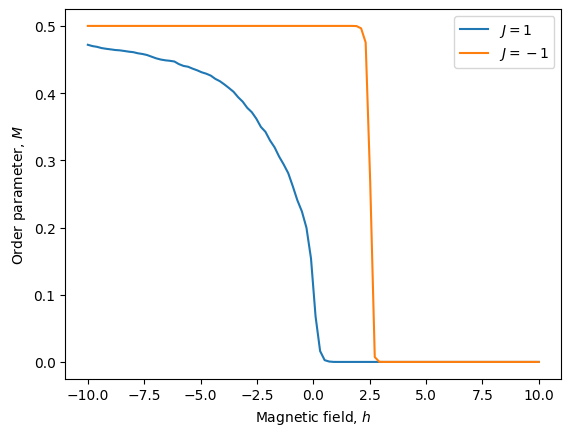

In [17]:
plt.plot(h_range, MVsH_J1, label=r'$J=1$')
plt.plot(h_range, MVsH_J2, label=r'$J=-1$')

plt.legend()
plt.xlabel(r'Magnetic field, $h$')
plt.ylabel(r'Order parameter, $M$')
plt.show()

In [18]:
MvsH = [MVsH_J1, MVsH_J2]
np.savez('M(h)_N=500_iteration=20000.npz', *MvsH)

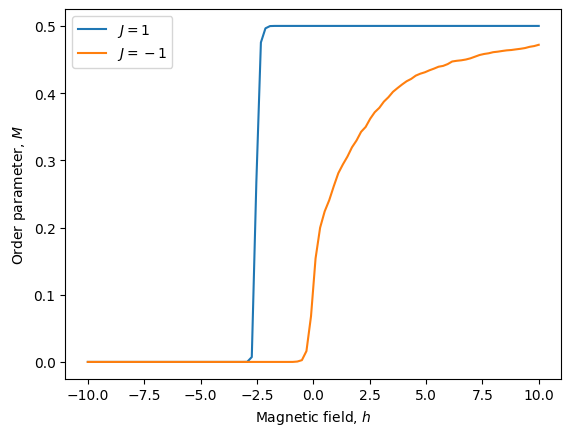

In [32]:
invertJ1 = MVsH_J1[::-1]
invertJ2 = MVsH_J2[::-1]

plt.plot(h_range, invertJ2, label=r'$J=1$')
plt.plot(h_range, invertJ1, label=r'$J=-1$')

plt.legend()
plt.xlabel(r'Magnetic field, $h$')
plt.ylabel(r'Order parameter, $M$')
plt.show()

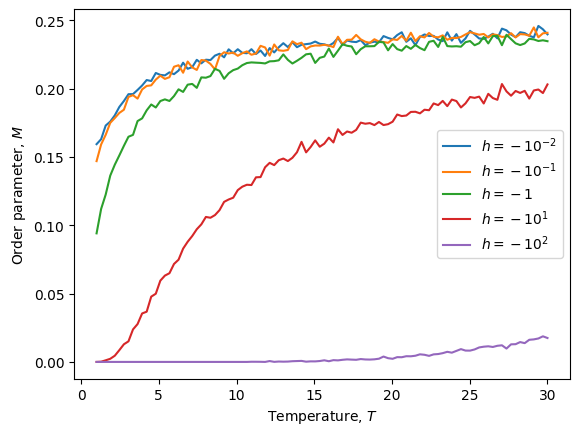

In [36]:
#Load data:
loaded_data = np.load('M(T)_N=500_iteration=20000_J=1.npz')
loaded_list = [loaded_data[key] for key in loaded_data.keys()]

h_strings = [r'$h = -10^{-2}$', r'$h=-10^{-1}$', r'$h=-1$', r'$h=-10^1$', r'$h=-10^2$']

for i in range(len(M)):
    plt.plot(t_range, loaded_list[i], label=h_strings[i])

plt.legend()
plt.xlabel(r'Temperature, $T$')
plt.ylabel(r'Order parameter, $M$')
plt.show()

In [ ]:
flipM_J1 = []

for i in range(len(M)):
    flipM_J1.append([1 - x for x in M[i]])

In [50]:
flipM_J2 = []

for i in range(len(loaded_list)):
    flipM_J2.append([1 - x for x in loaded_list[i]])

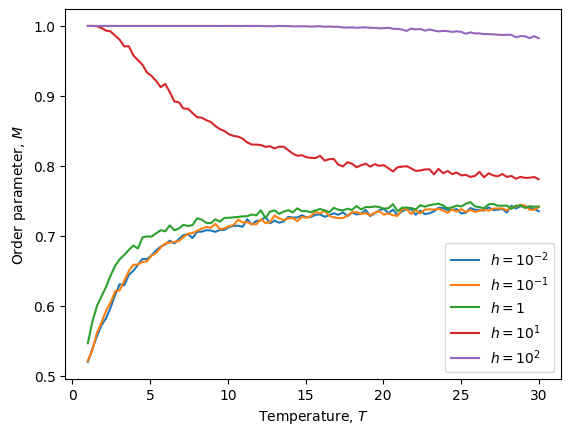

In [52]:
import matplotlib.pyplot as plt

h_strings = [r'$h=10^{-2}$', r'$h=10^{-1}$', r'$h=1$', r'$h=10^1$', r'$h=10^2$']

for i in range(len(flipM_J1)):
    plt.plot(t_range, flipM_J1[i], label=h_strings[i])

plt.legend()
plt.xlabel(r'Temperature, $T$')
plt.ylabel(r'Order parameter, $M$')
plt.show()

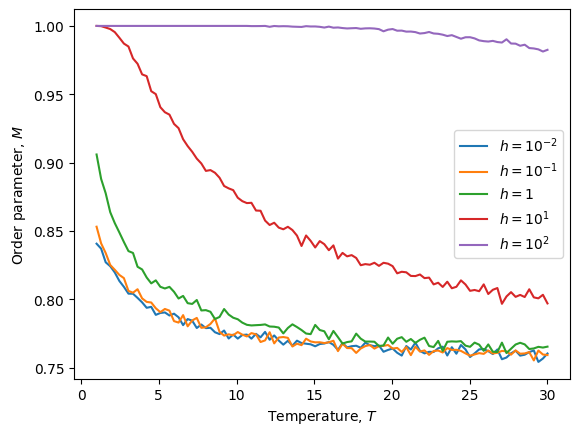

In [53]:
import matplotlib.pyplot as plt

h_strings = [r'$h=10^{-2}$', r'$h=10^{-1}$', r'$h=1$', r'$h=10^1$', r'$h=10^2$']

for i in range(len(flipM_J2)):
    plt.plot(t_range, flipM_J2[i], label=h_strings[i])

plt.legend()
plt.xlabel(r'Temperature, $T$')
plt.ylabel(r'Order parameter, $M$')
plt.show()